# Homework 4 

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic) for 7 days (Include each day of the week)

1. Create two bar graphs of the power consumption per hour.

    * One bar graph has 24 bars showing the average consumption
    * One bar graph has 7x24 bars showing the average demand 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [47]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Admin\Downloads\RollingSystemDemand_20220301_1810.csv",
                         index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)

df.columns=['VD','measurement_time','values']
df['measurement_time']=pd.to_datetime( df['measurement_time'].astype(str), format='%Y%m%d%H%M%S')
f=df.resample('H',on='measurement_time').values.mean()
df1=pd.DataFrame({'time':f.index,'means':f.values})
df1['new_date'] = [d.date() for d in df1['time']]
df1['new_time'] = [d.time() for d in df1['time']]
df2=df1.groupby('new_time').mean()
df3=pd.DataFrame({'time':df2.index,'means':df2.means})
df4 = df3['time'].astype(str)

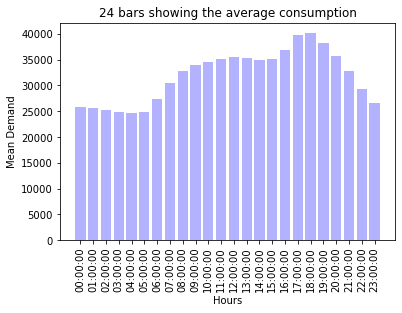

In [48]:
plt.bar(df4.values,df2.means,color='blue',alpha=0.3)
plt.xticks(rotation=90)
plt.title("24 bars showing the average consumption")
plt.xlabel("Hours")
plt.ylabel("Mean Demand")
plt.show()

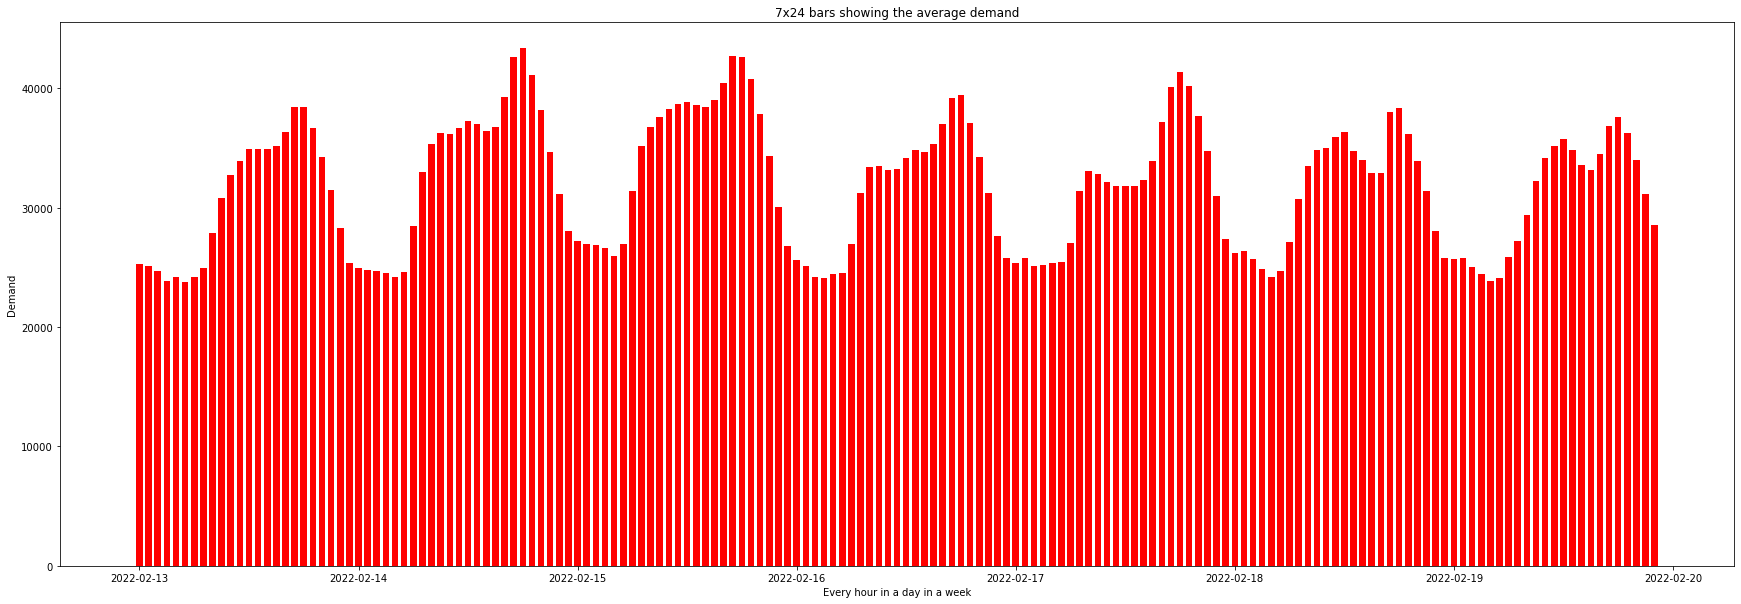

In [49]:
plt.figure(figsize=(30,10))
plt.bar(df1.time,df1.means,width=0.03,color='red')
plt.title("7x24 bars showing the average demand")
plt.xlabel("Every hour in a day in a week")
plt.ylabel("Demand")
plt.show()